# 다이아몬드 가격 예측하기

In [49]:
# import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
# 데이터 불러오기
diamonds = pd.read_csv("DiamondsPrices2022.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
diamonds['Unnamed: 0']

0            1
1            2
2            3
3            4
4            5
         ...  
53938    53939
53939    53940
53940    53941
53941    53942
53942    53943
Name: Unnamed: 0, Length: 53943, dtype: int64

In [17]:
# 의미없는 컬럼인 Unnamed drop 
diamonds.drop("Unnamed: 0", axis= 1 , inplace = True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [18]:
# info 확인
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


> null값 없음      
> 53943 rows      
> dtype 확인    

In [19]:
# 수치 데이터 
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> x , y , z 컬럼에 0 값이 왜 있지?

In [20]:
# x,y,z 컬럼이 0 값인 데이터 
diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)]
len(diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)].index)

20

In [21]:
# 0 데이터 삭제
diamonds.drop(diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)].index , inplace= True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [22]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000
mean,0.797693,61.749432,57.456902,3930.927879,5.731628,5.734888,3.540042
std,0.473783,1.432336,2.234123,3987.179153,1.119392,1.140094,0.702511
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.500000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> 20개 데이터가 삭제 되어 53923 rows × 10 columns

In [23]:
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


> Q ) 원핫인코딩으로 정제하는게 좋을지 , 단계별 숫자를 할당 (ex 'Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 5,4,3,2,1) 해서 하는게 좋을지       
> A ) 순서에 의미가 있으면 숫자로 변환하면 된다. 1부터 시작하는게 좋다. 

### 데이터 정규화, 표준화 하는법
같은 단위로 측정한 컬럼은 같이 스케일 하면 된다. (x,y,z - mm)        
depth 처럼 계산되어있는 컬럼은 정규화 한 xyz로 다시 계산하여 새로 컬럼을 만든다.       
table 처럼 percentage 컬럼은 계산 식이 없기 때문에 100으로 나눠 정규화 한다.             
caret은 따로 정규화(min , max)            

## 컬럼 설명
- carat : 캐럿 (중량) 
| 다이아몬드 캐럿은 다이아몬드의 무게를 측정합니다         
| 0.2 ~ 5.01

- cut : 컷팅 
| 다이아몬드 컷은 다이아몬드의 면이 빛과 얼마나 잘 상호 작용하는지를 의미합니다               
| (하) Fair, Good, Very Good, Premium, Ideal (상)             

- color : 색 
| 화학적으로 순수하고 구조적으로 완벽한 다이아몬드는 순수한 물 한 방울과 같은 색조가 없으므로 결과적으로 더 높은 가치가 있습니다. (D~Z)             
| (상) D E F G H I J  (하)

- clarity : 투명도 
| 다이아몬드 선명도는 내포물 및 흠이 없음을 나타냅니다. (I1~IF)            
| (상) IF , VVS1, VVS2, VS1, VS2, SI1, SI2, I1 (하)

- depth : total depth percentage = z / mean(x, y) 
| [ 2 * z / (x + y) ]               
| 43 ~ 79

- table : 다이아몬드 테이블 
| width of top of diamond relative to widest point(%)          
| 43 ~ 95

- price : 가격 
| 단위 $             
| 326 ~ 18823

- x : 측정 길이 length 
| 단위 mm          
| 3.73 ~ 10.74

- y : 측정 너비 width
| 단위 mm             
| 3.68 ~ 58.9

- z : 측정 깊이 depth
| 단위 mm              
| 1.07 ~ 31.8

> 설명 출처 : https://4cs.gia.edu/en-us/diamond-cut/

In [26]:
diamondsV2 = diamonds.copy()

### 글자 데이터 컬럼 변환
cut , color , clarity 컬럼

In [27]:
diamondsV2['cut'] = diamondsV2['cut'].map({"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5})
diamondsV2['color'] = diamondsV2['color'].map({"D" : 7 ,"E" : 6 ,"F" : 5 ,"G" : 4 , "H" : 3 , "I" : 2 , "J" : 1})
diamondsV2['clarity'] = diamondsV2['clarity'].map({"IF" : 8 , "VVS1" : 7 , "VVS2" : 6 , "VS1" : 5 , "VS2" : 4 , "SI1" : 3 , "SI2" : 2 , "I1" : 1})

In [28]:
diamondsV2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [83]:
# 카테고리 컬럼 빈도수 확인
colums = ['cut' , 'color' , 'clarity']
for col in colums:
   print("Column :", col)
   print(diamonds[col].value_counts().sort_values())
   print("--------------------------------")

Column : cut
Fair          1609
Good          4902
Very Good    12082
Premium      13782
Ideal        21548
Name: cut, dtype: int64
--------------------------------
Column : color
J     2808
I     5421
D     6774
H     8298
F     9539
E     9799
G    11284
Name: color, dtype: int64
--------------------------------
Column : clarity
I1        738
IF       1790
VVS1     3654
VVS2     5066
VS1      8170
SI2      9185
VS2     12255
SI1     13065
Name: clarity, dtype: int64
--------------------------------


## 데이터 시각화

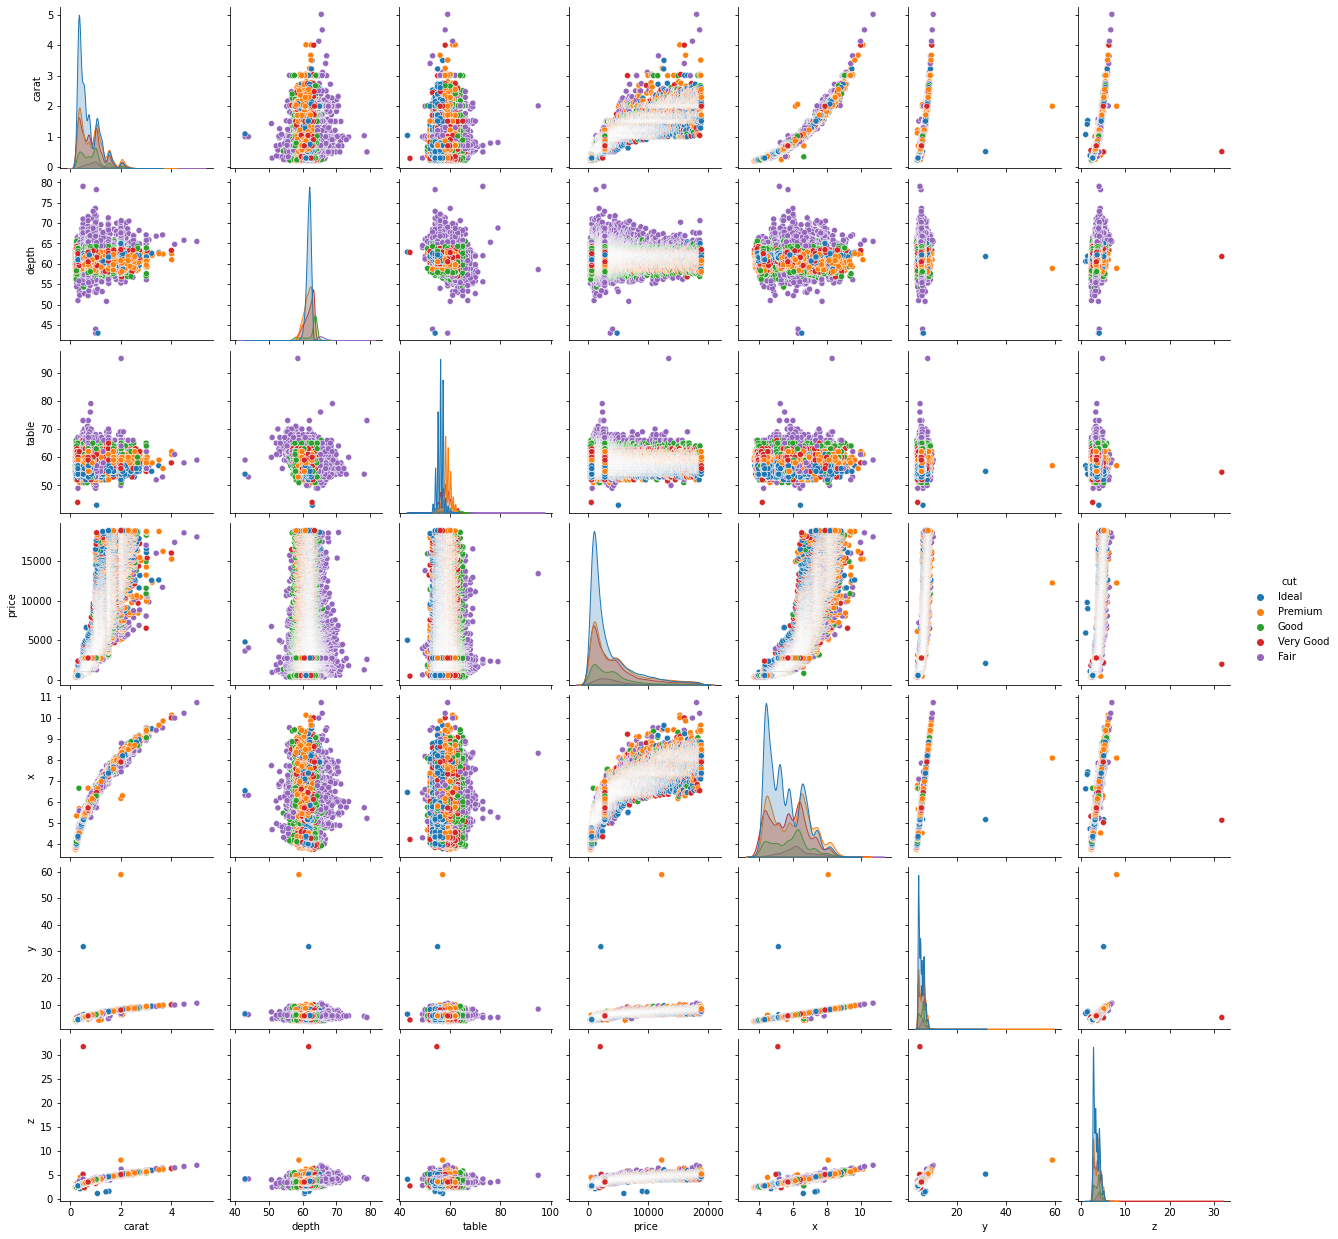

In [29]:
sns.pairplot(
    diamonds,
    hue= 'cut'
    )

plt.show()

In [65]:
# plt.figure(figsize=(20,20))

# sns.swarmplot(
#     'cut',
#     'price',
#     data=diamonds,
#     # fit_reg=False,
#     # markers = ['o','x'],
#     # scatter_kws={'s':100}, #좌표상의 점의 크기
#     # hue='cut', #대상값

# )
# plt.title('diamonds')
# plt.show()

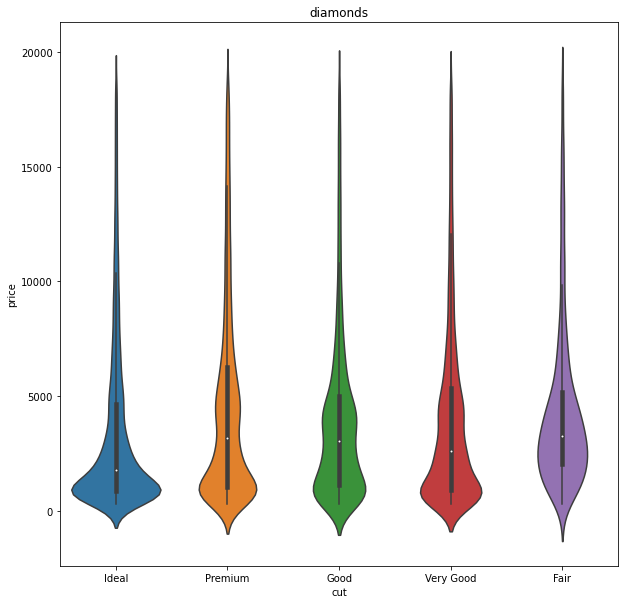

In [115]:
plt.figure(figsize=(10,10))

sns.violinplot(
    'cut',
    'price',
    data=diamonds,

)
plt.title('diamonds')
plt.show()

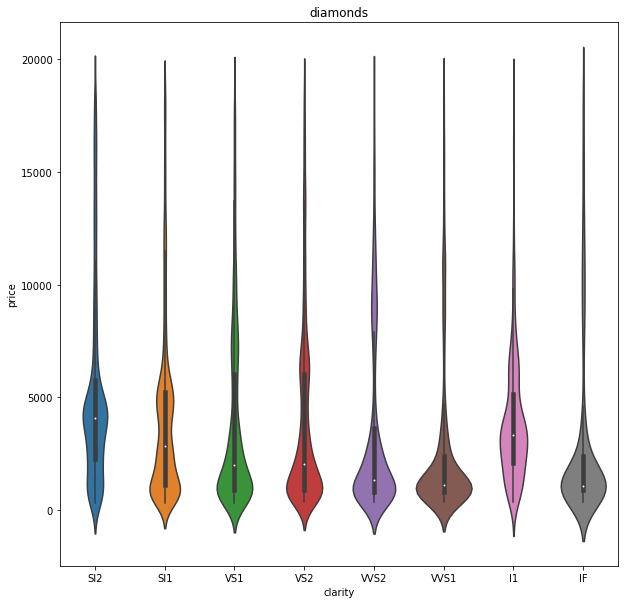

In [116]:
plt.figure(figsize=(10,10))

sns.violinplot(
    'clarity',
    'price',
    data=diamonds,

)
plt.title('diamonds')
plt.show()

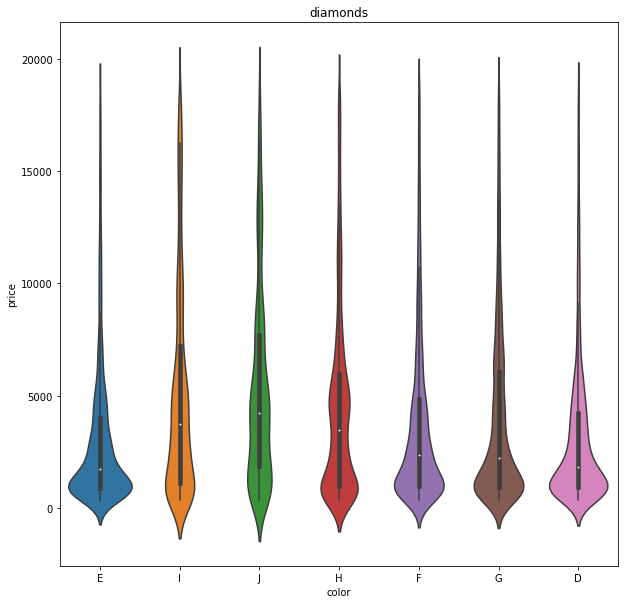

In [117]:
plt.figure(figsize=(10,10))

sns.violinplot(
    'color',
    'price',
    data=diamonds,

)
plt.title('diamonds')
plt.show()

In [ ]:
# sns.jointplot(
#     'carat',
#     'price',
#     data = diamonds[diamonds['color']=="D"],
# )
# sns.jointplot(
#     'carat',
#     'price',
#     data = diamonds[diamonds['color']=="E"],
# )

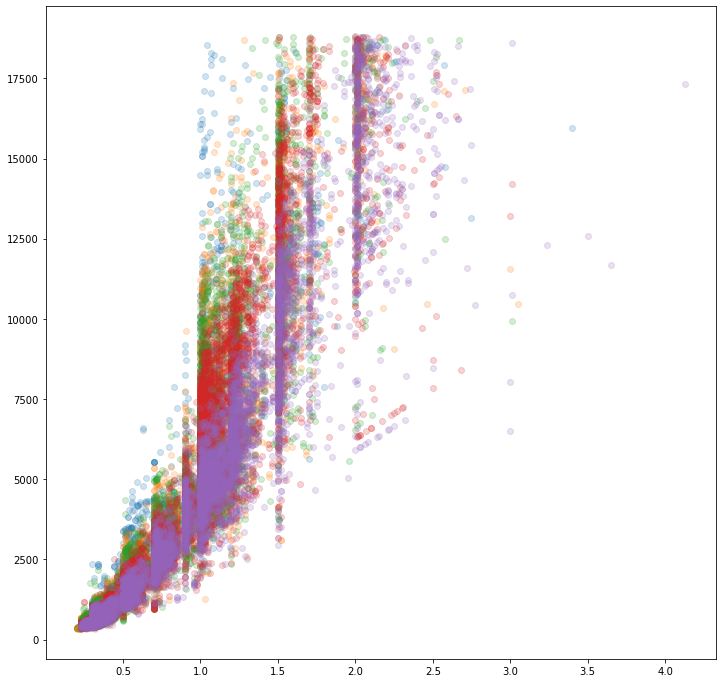

In [106]:
plt.figure(figsize = (12,12))
plt.scatter(
    'carat',
    'price',
    data = diamonds[diamonds['color']=="D"],
    alpha=0.2
)
plt.scatter(
    'carat',
    'price',
    data = diamonds[diamonds['color']=="E"],
    alpha=0.2
)
plt.scatter(
    'carat',
    'price',
    data = diamonds[diamonds['color']=="F"],
    alpha=0.2
)
plt.scatter(
    'carat',
    'price',
    data = diamonds[diamonds['color']=="G"],
    alpha=0.2
)
plt.scatter(
    'carat',
    'price',
    data = diamonds[diamonds['color']=="H"],
    alpha=0.2
)

plt.show()

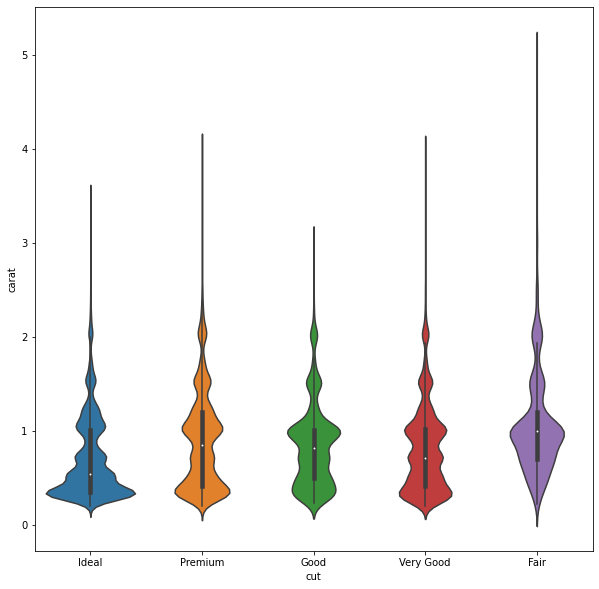

In [122]:
plt.figure(figsize=(10,10))
sns.violinplot(
    'cut',
    'carat',
    data = diamonds,
    alpha=0.2
)

plt.show()

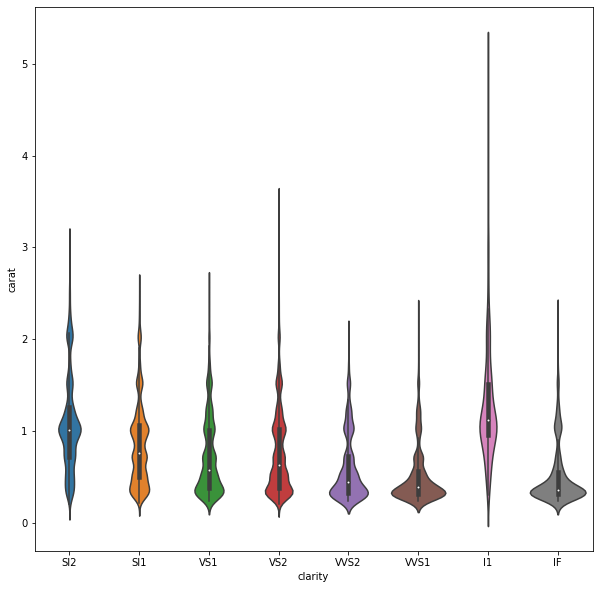

In [123]:
plt.figure(figsize=(10,10))
sns.violinplot(
    'clarity',
    'carat',
    data = diamonds,
    alpha=0.2
)

plt.show()

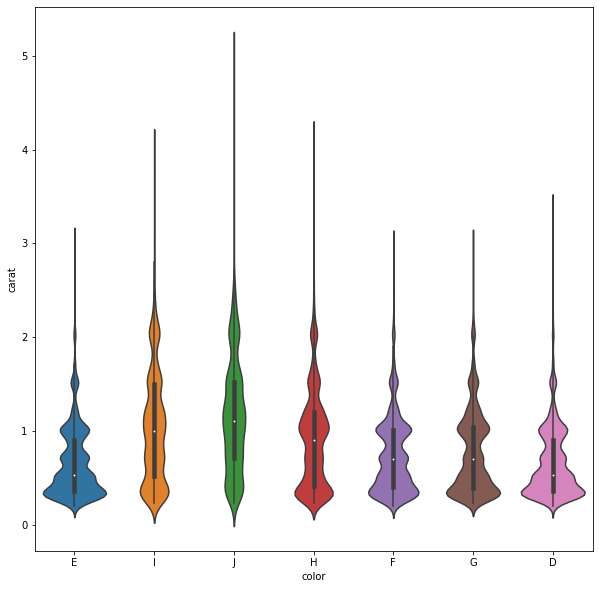

In [124]:
plt.figure(figsize=(10,10))
sns.violinplot(
    'color',
    'carat',
    data = diamonds,
    alpha=0.2
)

plt.show()